In [ ]:
!pip install mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 11.6 MB/s eta 0:00:00


In [ ]:
from google.colab import files

Saving normal_afff083fc217bb0f28fa_jpg.rf.cb4d3e76469247b20d0c2be45a27821d_aug_3.jpg to normal_afff083fc217bb0f28fa_jpg.rf.cb4d3e76469247b20d0c2be45a27821d_aug_3 (1).jpg
1/1 [==============================] - 0s 137ms/step


1/1 [==============================] - 0s 146ms/step
Face cropped and saved successfully.


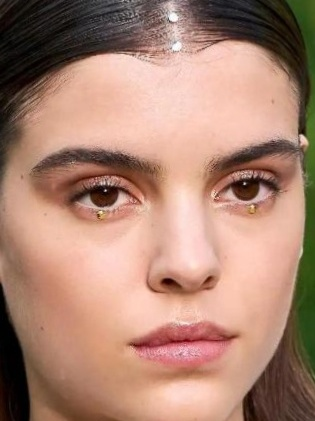

In [ ]:
from mtcnn import MTCNN
import cv2
from google.colab.patches import cv2_imshow

# Load the MTCNN face detection model
mtcnn = MTCNN()

# Function to detect faces in an image and save the cropped face
def detect_and_save_face(image_path, output_path):
    # Read the input image
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Detect faces in the image
    detections = mtcnn.detect_faces(img_rgb)

    # Check if any faces were detected
    if detections:
        # Extract the first detected face
        x, y, width, height = detections[0]['box']

        # Crop the face region
        face_img = img[y:y+height, x:x+width]

        # Save the cropped face image
        cv2.imwrite(output_path, face_img)
        print("Face cropped and saved successfully.")
        return True
    else:
        print("No faces were detected in the image.")
        return False

# Upload the image file
uploaded = files.upload()
filename = next(iter(uploaded))

# Input image path and output face image path
input_image_path = filename
output_face_path = "face_image.jpg"

# Detect and save the face
detect_and_save_face(input_image_path, output_face_path)

# Display the cropped face image
face_img = cv2.imread(output_face_path)
cv2_imshow(face_img)

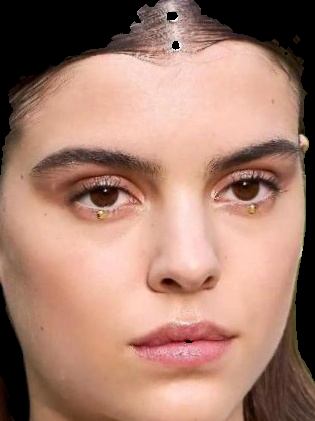

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Function to detect skin regions in an image
def skin_detection(image):
    # Convert the image to YCrCb color space
    ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)

    # Define lower and upper thresholds for skin color in YCrCb space
    lower = np.array([0, 135, 85], dtype=np.uint8)
    upper = np.array([255, 180, 135], dtype=np.uint8)

    # Create a binary mask to detect skin regions
    mask = cv2.inRange(ycrcb, lower, upper)

    # Apply morphological operations to remove noise
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=2)
    mask = cv2.dilate(mask, kernel, iterations=1)

    return mask

# Function to display skin regions within the cropped face image
def display_skin_regions(image):
    # Detect skin regions in the image
    skin_mask = skin_detection(image)

    # Extract the skin regions using the mask
    skin_regions = cv2.bitwise_and(image, image, mask=skin_mask)

    # Display the skin regions
    cv2_imshow(skin_regions)

# Read the cropped face image
face_img = cv2.imread("face_image.jpg")

# Display skin regions within the cropped face image
display_skin_regions(face_img)

Saving normal_afff083fc217bb0f28fa_jpg.rf.cb4d3e76469247b20d0c2be45a27821d_aug_3.jpg to normal_afff083fc217bb0f28fa_jpg.rf.cb4d3e76469247b20d0c2be45a27821d_aug_3 (2).jpg
1/1 [==============================] - 0s 130ms/step


1/1 [==============================] - 0s 229ms/step
Face cropped and saved successfully: face_image_1.jpg


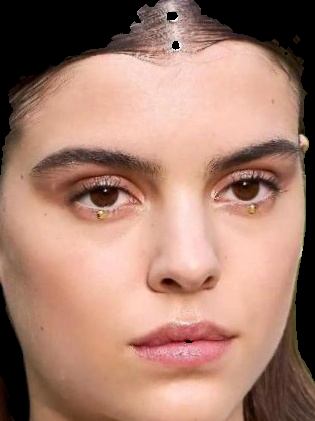

In [ ]:
from mtcnn import MTCNN
import cv2
import numpy as np
from google.colab import files

# Load the MTCNN face detection model
mtcnn = MTCNN()

# Function to detect faces in an image and save the cropped face
def detect_and_save_face(image_path, output_path):
    # Read the input image
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Detect faces in the image
    detections = mtcnn.detect_faces(img_rgb)

    # Check if any faces were detected
    if detections:
        # Extract the first detected face
        x, y, width, height = detections[0]['box']

        # Crop the face region
        face_img = img[y:y+height, x:x+width]

        # Save the cropped face image
        cv2.imwrite(output_path, face_img)
        print(f"Face cropped and saved successfully: {output_path}")
        return True
    else:
        print(f"No faces were detected in the image: {image_path}")
        return False

# Function to detect skin regions in an image
def skin_detection(image):
    # Convert the image to YCrCb color space
    ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)

    # Define lower and upper thresholds for skin color in YCrCb space
    lower = np.array([0, 135, 85], dtype=np.uint8)
    upper = np.array([255, 180, 135], dtype=np.uint8)

    # Create a binary mask to detect skin regions
    mask = cv2.inRange(ycrcb, lower, upper)

    # Apply morphological operations to remove noise
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=2)
    mask = cv2.dilate(mask, kernel, iterations=1)

    return mask

# Function to display skin regions within the cropped face image
def display_skin_regions(image):
    # Detect skin regions in the image
    skin_mask = skin_detection(image)

    # Extract the skin regions using the mask
    skin_regions = cv2.bitwise_and(image, image, mask=skin_mask)

    # Display the skin regions
    cv2_imshow(skin_regions)

# Function to process a set of images
def process_images(image_paths):
    for i, image_path in enumerate(image_paths):
        output_face_path = f"face_image_{i+1}.jpg"
        if detect_and_save_face(image_path, output_face_path):
            # Read the cropped face image
            face_img = cv2.imread(output_face_path)

            # Display skin regions within the cropped face image
            display_skin_regions(face_img)
        else:
            # If no face is detected, extract skin regions or get the image as a whole
            img = cv2.imread(image_path)
            skin_mask = skin_detection(img)
            if np.any(skin_mask):
                skin_regions = cv2.bitwise_and(img, img, mask=skin_mask)
                cv2_imshow(skin_regions)
            else:
                cv2_imshow(img)

# Upload the image files
uploaded = files.upload()

# Get the list of uploaded image file paths
image_paths = list(uploaded.keys())

# Process the set of images
process_images(image_paths)

In [ ]:
from mtcnn import MTCNN
import cv2
import numpy as np
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the MTCNN face detection model
mtcnn = MTCNN()

# Function to detect faces in an image and save the processed skin image
def detect_and_process_skin(image_path, output_folder):
    # Read the input image
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Detect faces in the image
    detections = mtcnn.detect_faces(img_rgb)

    # Check if any faces were detected
    if detections:
        # Extract the first detected face
        x, y, width, height = detections[0]['box']

        # Crop the face region
        face_img = img[y:y+height, x:x+width]

        # Process skin regions within the cropped face image
        processed_skin_image = process_skin_regions(face_img)

        # Save the processed skin image
        output_skin_path = f"{output_folder}/processed_skin_{os.path.basename(image_path)}"
        cv2.imwrite(output_skin_path, processed_skin_image)
        print(f"Processed skin image saved successfully: {output_skin_path}")
        return True
    else:
        print(f"No faces were detected in the image: {image_path}")
        # If no faces are detected, extract skin regions or save the original image
        skin_mask = skin_detection(img)
        if np.any(skin_mask):
            # Extract skin regions using the mask
            skin_regions = cv2.bitwise_and(img, img, mask=skin_mask)
            output_skin_path = f"{output_folder}/processed_skin_{os.path.basename(image_path)}"
            cv2.imwrite(output_skin_path, skin_regions)
            print(f"Processed skin image saved successfully: {output_skin_path}")
        else:
            # Save the original image if no skin regions are detected
            output_original_path = f"{output_folder}/original_{os.path.basename(image_path)}"
            cv2.imwrite(output_original_path, img)
            print(f"No skin regions detected. Original image saved: {output_original_path}")
        return False

# Function to detect skin regions in an image
def skin_detection(image):
    # Convert the image to YCrCb color space
    ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)

    # Define lower and upper thresholds for skin color in YCrCb space
    lower = np.array([0, 135, 85], dtype=np.uint8)
    upper = np.array([255, 180, 135], dtype=np.uint8)

    # Create a binary mask to detect skin regions
    mask = cv2.inRange(ycrcb, lower, upper)

    # Apply morphological operations to remove noise
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=2)
    mask = cv2.dilate(mask, kernel, iterations=1)

    return mask

# Function to process skin regions in an image
def process_skin_regions(image):
    # Detect skin regions in the image
    skin_mask = skin_detection(image)

    # Extract the skin regions using the mask
    skin_regions = cv2.bitwise_and(image, image, mask=skin_mask)

    return skin_regions

# Function to process a set of images
def process_images(image_paths, output_folder):
    for i, image_path in enumerate(image_paths):
        detect_and_process_skin(image_path, output_folder)

# Path to the input folder in Google Drive
input_folder = '/content/drive/My Drive/Dtaset'
# Path to the output folder in Google Drive
output_folder = '/content/drive/My Drive/Prossed_Images'

# List files in the input folder
import os
image_files = [os.path.join(input_folder, f) for f in os.listdir(input_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Process the images
process_images(image_files, output_folder)